In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, mean_squared_error

In [ ]:
# Load data
bachelors_loan_debt = pd.read_csv('data/01_bachelors_degree_student_loan_debt.csv')
bachelors_career_pay = pd.read_csv('data/02_bachelors_degree_subject_career_pay.csv')
masters_loan_debt = pd.read_csv('data/03_masters_degree_student_loan_debt.csv')
masters_career_pay = pd.read_csv('data/04_masters_degree_subject_career_pay.csv')
borrowers_age_grp = pd.read_csv('data/05_num_borrowers_by_age_grp.csv')
borrowers_credit_score = pd.read_csv('data/06_num_borrowers_by_credit_score_grp.csv')
borrowers_payment_status = pd.read_csv('data/07_num_borrowers_by_pmt_status.csv')
balance_age_grp = pd.read_csv('data/08_total_balance_by_age_grp.csv')
balance_payment_status = pd.read_csv('data/09_total_balance_by_borrower_pmt_status.csv')
balance_credit_score = pd.read_csv('data/10_total_balance_by_credit_score_grp.csv')
descriptive_stats = pd.read_csv('data/11_descriptive_statistic_of_borrowers.csv')
borrowers_distribution = pd.read_csv('data/12_distribution_of_borrowers_by_balance.csv')
unemployment_rate = pd.read_csv('data/13_unemployment_rate.csv')


In [12]:
print(bachelors_loan_debt.head())
print(bachelors_loan_debt.info())
print(bachelors_loan_debt.isnull().sum())

print(bachelors_career_pay.head())
print(bachelors_career_pay.info())
print(bachelors_career_pay.isnull().sum())

print(masters_loan_debt.head())
print(masters_loan_debt.info())
print(masters_loan_debt.isnull().sum())

print(masters_career_pay.head())
print(masters_career_pay.info())
print(masters_career_pay.isnull().sum())

print(borrowers_age_grp.head())
print(borrowers_age_grp.info())
print(borrowers_age_grp.isnull().sum())

print(borrowers_credit_score.head())
print(borrowers_credit_score.info())
print(borrowers_credit_score.isnull().sum())

print(borrowers_payment_status.head())
print(borrowers_payment_status.info())
print(borrowers_payment_status.isnull().sum())

print(balance_age_grp.head())
print(balance_age_grp.info())
print(balance_age_grp.isnull().sum())

print(balance_payment_status.head())
print(balance_payment_status.info())
print(balance_payment_status.isnull().sum())

print(balance_credit_score.head())
print(balance_credit_score.info())
print(balance_credit_score.isnull().sum())

print(descriptive_stats.head())
print(descriptive_stats.info())
print(descriptive_stats.isnull().sum())

print(borrowers_distribution.head())
print(borrowers_distribution.info())
print(borrowers_distribution.isnull().sum())

print(unemployment_rate.head())
print(unemployment_rate.info())
print(unemployment_rate.isnull().sum())

      Degree                  Subject 2022 Median Debt
0  Bachelors               Accounting         $24,086 
1  Bachelors    Aerospace Engineering         $25,233 
2  Bachelors   Biomedical Engineering         $24,372 
3  Bachelors  Business Administration         $24,351 
4  Bachelors     Chemical Engineering         $23,821 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Degree            25 non-null     object
 1   Subject           25 non-null     object
 2   2022 Median Debt  25 non-null     object
dtypes: object(3)
memory usage: 728.0+ bytes
None
Degree              0
Subject             0
2022 Median Debt    0
dtype: int64
      Degree                  Subject Early Career Salary Projected Job Growth
0  Bachelors               Accounting         $51,002.00                 4.00%
1  Bachelors    Aerospace Engineering         $82,0

In [ ]:
#File 1
# Inspect
print(bachelors_loan_debt.info())
print(bachelors_loan_debt.head())


bachelors_loan_debt.fillna(0, inplace=True)

# Rename columns
bachelors_loan_debt.rename(columns={"2022 Median Debt": "Median_Debt"}, inplace=True)


bachelors_loan_debt['Median_Debt'] = pd.to_numeric(bachelors_loan_debt['Median_Debt'], errors='coerce')


bachelors_loan_debt['Degree_Type'] = 'Bachelors'

# Save cleaned file
bachelors_loan_debt.to_csv('cleaned_bachelors_loan_debt.csv', index=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Degree            25 non-null     object
 1   Subject           25 non-null     object
 2   2022 Median Debt  25 non-null     object
dtypes: object(3)
memory usage: 728.0+ bytes
None
      Degree                  Subject 2022 Median Debt
0  Bachelors               Accounting         $24,086 
1  Bachelors    Aerospace Engineering         $25,233 
2  Bachelors   Biomedical Engineering         $24,372 
3  Bachelors  Business Administration         $24,351 
4  Bachelors     Chemical Engineering         $23,821 


In [ ]:
#File 2

# Inspect
print(bachelors_career_pay.info())
print(bachelors_career_pay.head())


bachelors_career_pay.fillna(0, inplace=True)

# Rename columns
bachelors_career_pay.rename(columns={"Early Career Salary": "Early_Career_Salary", 
                                     "Projected Job Growth": "Job_Growth"}, inplace=True)


bachelors_career_pay['Early_Career_Salary'] = pd.to_numeric(bachelors_career_pay['Early_Career_Salary'], errors='coerce')
bachelors_career_pay['Job_Growth'] = pd.to_numeric(bachelors_career_pay['Job_Growth'], errors='coerce')

# Save cleaned file
bachelors_career_pay.to_csv('cleaned_bachelors_career_pay.csv', index=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Degree                25 non-null     object
 1   Subject               25 non-null     object
 2   Early Career Salary   25 non-null     object
 3   Projected Job Growth  25 non-null     object
dtypes: object(4)
memory usage: 928.0+ bytes
None
      Degree                  Subject Early Career Salary Projected Job Growth
0  Bachelors               Accounting         $51,002.00                 4.00%
1  Bachelors    Aerospace Engineering         $82,053.00                 6.00%
2  Bachelors   Biomedical Engineering         $70,486.00                 5.00%
3  Bachelors  Business Administration         $51,489.00                10.00%
4  Bachelors     Chemical Engineering         $75,427.00                 8.00%


In [15]:
#File 3

print(masters_loan_debt.info())
print(masters_loan_debt.head())

masters_loan_debt.fillna(0, inplace=True)
masters_loan_debt.rename(columns={"2022 Median Debt": "Median_Debt"}, inplace=True)
masters_loan_debt['Median_Debt'] = pd.to_numeric(masters_loan_debt['Median_Debt'], errors='coerce')
masters_loan_debt['Degree_Type'] = 'Masters'

masters_loan_debt.to_csv('cleaned_masters_loan_debt.csv', index=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Masters Degree    15 non-null     object 
 1   Subject           15 non-null     object 
 2   2022 Median Debt  15 non-null     object 
 3   x                 0 non-null      float64
 4   x.1               0 non-null      float64
 5   x.2               0 non-null      float64
dtypes: float64(3), object(3)
memory usage: 848.0+ bytes
None
  Masters Degree                  Subject 2022 Median Debt   x  x.1  x.2
0        Masters  Business Administration         $43,251  NaN  NaN  NaN
1        Masters     Chemical Engineering         $42,343  NaN  NaN  NaN
2        Masters     Computer Engineering         $42,647  NaN  NaN  NaN
3        Masters                Economics         $43,053  NaN  NaN  NaN
4        Masters              Engineering         $33,235  NaN  NaN  NaN


In [ ]:
#File 4

# Inspect the data
print(masters_career_pay.info())
print(masters_career_pay.head())


masters_career_pay.fillna(0, inplace=True)

# Rename columns
masters_career_pay.rename(columns={"Early Career Salary": "Early_Career_Salary", 
                                     "Projected Job Growth": "Job_Growth"}, inplace=True)


masters_career_pay['Early_Career_Salary'] = pd.to_numeric(masters_career_pay['Early_Career_Salary'], errors='coerce')
masters_career_pay['Job_Growth'] = pd.to_numeric(masters_career_pay['Job_Growth'], errors='coerce')

# Save cleaned file
masters_career_pay.to_csv('cleaned_masters_career_pay.csv', index=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Degree               15 non-null     object 
 1   Subject              15 non-null     object 
 2   Early_Career_Salary  0 non-null      float64
 3   Job_Growth           0 non-null      float64
 4   x                    15 non-null     float64
 5   x.1                  15 non-null     float64
 6   x.2                  15 non-null     float64
dtypes: float64(5), object(2)
memory usage: 968.0+ bytes
None
    Degree                  Subject  Early_Career_Salary  Job_Growth    x  \
0  Masters  Business Administration                  NaN         NaN  0.0   
1  Masters     Chemical Engineering                  NaN         NaN  0.0   
2  Masters     Computer Engineering                  NaN         NaN  0.0   
3  Masters                Economics                  NaN         NaN  0.0   
4

In [ ]:
borrowers_age_grp.rename(columns={
    'under 30': 'under_30',
    '30-39': 'thirty_to_thirtynine',
    '40-49': 'forty_to_fortynine',
    '50-59': 'fifty_to_fiftynine',
    '60+': 'sixty_plus'
}, inplace=True)

print(borrowers_age_grp.columns)

borrowers_age_grp.rename(columns={
    'under 30 ': 'under_30',
    '30-39 ': 'thirty_to_thirtynine',
    '40-49 ': 'forty_to_fortynine',
    '50-59 ': 'fifty_to_fiftynine',
    '60+ ': 'sixty_plus'
}, inplace=True)

Index(['year', 'under_30', 'thirty_to_thirtynine', 'forty_to_fortynine',
       'fifty_to_fiftynine', 'sixty_plus', 'Total'],
      dtype='object')


In [ ]:
age_columns = ['under_30', 'thirty_to_thirtynine', 'forty_to_fortynine', 'fifty_to_fiftynine', 'sixty_plus']


borrowers_age_grp[age_columns] = borrowers_age_grp[age_columns].apply(pd.to_numeric, errors='coerce')



borrowers_age_grp['Total_Borrowers'] = borrowers_age_grp[age_columns].sum(axis=1)

borrowers_age_grp.to_csv('cleaned_borrowers_age_grp.csv', index=False)



In [31]:
print(borrowers_age_grp.head())

   year  under_30  thirty_to_thirtynine  forty_to_fortynine  \
0  2004    11.343                 5.672               3.162   
1  2005    12.062                 6.120               3.454   
2  2006    12.928                 6.765               3.865   
3  2007    13.401                 7.235               4.089   
4  2008    14.217                 8.066               4.440   

   fifty_to_fiftynine  sixty_plus   Total  Total_Borrowers  
0               2.091       0.577  22.845           22.845  
1               2.385       0.680  24.701           24.701  
2               2.842       0.893  27.293           27.293  
3               3.125       1.069  28.919           28.919  
4               3.464       1.264  31.451           31.451  


In [ ]:
print(borrowers_credit_score.info())


borrowers_credit_score.fillna(0, inplace=True)


borrowers_credit_score.iloc[:, 1:] = borrowers_credit_score.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')

# Save the cleaned data
borrowers_credit_score.to_csv('cleaned_borrowers_credit_score.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   year     19 non-null     int64  
 1   <620     19 non-null     float64
 2   620-659  19 non-null     float64
 3   660-719  19 non-null     float64
 4   720-759  19 non-null     float64
 5   760+     19 non-null     float64
dtypes: float64(5), int64(1)
memory usage: 1.0 KB
None


In [ ]:
borrowers_payment_status.columns = borrowers_payment_status.columns.str.strip().str.lower()

borrowers_payment_status.rename(columns={
    'current, balance lower': 'current_balance_lower',
    'current, balance same or higher': 'current_balance_same_or_higher',
    '90+ delinquent': 'delinquent_90_plus'
}, inplace=True)



num_columns = ['current_balance_lower', 'current_balance_same_or_higher', 'delinquent_90_plus', 'default', 'total']


borrowers_payment_status[num_columns] = borrowers_payment_status[num_columns].apply(pd.to_numeric, errors='coerce')



print(borrowers_payment_status.isnull().sum())


borrowers_payment_status.fillna(0, inplace=True)

borrowers_payment_status.to_csv('cleaned_borrowers_pmt_status.csv', index=False)

borrowers_payment_status.head()


year                              0
current_balance_lower             0
current_balance_same_or_higher    0
delinquent_90_plus                0
default                           0
total                             0
dtype: int64


,year,current_balance_lower,current_balance_same_or_higher,delinquent_90_plus,default,total
0,2004,7.930,12.796,1.018,1.139,22.883
1,2005,9.275,12.954,1.018,1.447,24.694
2,2006,8.998,14.956,1.368,1.663,26.985
3,2007,10.723,14.774,1.435,1.926,28.858
4,2008,11.624,15.566,1.597,2.321,31.108


In [ ]:
#file 8 

# Inspect
print(balance_age_grp.info())
print(balance_age_grp.head())


balance_age_grp.columns = balance_age_grp.columns.str.strip().str.lower()


balance_columns = balance_age_grp.columns[1:] 
balance_age_grp[balance_columns] = balance_age_grp[balance_columns].apply(pd.to_numeric, errors='coerce')

# Save cleaned file
balance_age_grp.to_csv('cleaned_balance_age_grp.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      19 non-null     int64  
 1   under 30  19 non-null     float64
 2   30-39     19 non-null     float64
 3   40-49     19 non-null     float64
 4   50-59     19 non-null     float64
 5   60+       19 non-null     float64
 6   Total     19 non-null     object 
dtypes: float64(5), int64(1), object(1)
memory usage: 1.2+ KB
None
   year  under 30   30-39  40-49  50-59    60+   Total
0  2004    148.02  112.68  48.87  29.54   6.41  345.52
1  2005    162.80  127.72  56.38  36.47   8.27  391.64
2  2006    196.65  155.22  70.07  48.29  12.23  482.46
3  2007    220.85  176.13  80.48  56.76  15.97  550.19
4  2008    251.40  205.98  94.64  67.82  20.50  640.34


In [ ]:
#file 9

# Inspect
print(balance_payment_status.info())
print(balance_payment_status.head())


balance_payment_status.columns = balance_payment_status.columns.str.strip().str.lower()


balance_payment_status.rename(columns={
    'current, balance lower': 'current_balance_lower',
    'current, balance same or higher': 'current_balance_same_or_higher',
    '90+ delinquent': 'delinquent_90_plus',
    'default': 'default_balance'
}, inplace=True)


num_columns = ['current_balance_lower', 'current_balance_same_or_higher', 'delinquent_90_plus', 'default_balance', 'total']
balance_payment_status[num_columns] = balance_payment_status[num_columns].apply(pd.to_numeric, errors='coerce')


balance_payment_status.fillna(0, inplace=True)

# Save the cleaned file
balance_payment_status.to_csv('cleaned_total_balance_pmt_status.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   year                             20 non-null     object 
 1   current, balance lower           19 non-null     float64
 2   current, balance same or higher  19 non-null     float64
 3   90+ delinquent                   19 non-null     float64
 4   default                          19 non-null     float64
 5   Total                            19 non-null     object 
dtypes: float64(4), object(2)
memory usage: 1.1+ KB
None
   year  current, balance lower  current, balance same or higher  \
0  2004                   89.16                           228.72   
1  2005                  120.92                           238.11   
2  2006                  124.83                           309.09   
3  2007                  173.61                           324.25   
4  20

In [ ]:

# Inspect
print(balance_credit_score.info())
print(balance_credit_score.head())


balance_credit_score.columns = balance_credit_score.columns.str.strip().str.lower()


num_columns = balance_credit_score.columns[1:]  # All columns except 'year'
balance_credit_score[num_columns] = balance_credit_score[num_columns].apply(pd.to_numeric, errors='coerce')


balance_credit_score.fillna(0, inplace=True)

# Save the cleaned file
balance_credit_score.to_csv('cleaned_total_balance_credit_score.csv', index=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   year     19 non-null     int64  
 1   <620     19 non-null     float64
 2   620-659  19 non-null     float64
 3   660-719  19 non-null     float64
 4   720-759  19 non-null     float64
 5   760+     19 non-null     float64
dtypes: float64(5), int64(1)
memory usage: 1.0 KB
None
   year    <620  620-659  660-719  720-759    760+
0  2004  127.02    45.05    83.64    52.07   38.24
1  2005  143.65    48.81    91.80    58.90   48.65
2  2006  175.44    58.40   109.19    72.93   66.42
3  2007  199.54    64.09   121.30    82.52   82.40
4  2008  237.51    73.01   135.01    93.21  101.07


In [ ]:
# Inspect
print(descriptive_stats.info())
print(descriptive_stats.head())


descriptive_stats.columns = descriptive_stats.columns.str.strip().str.lower()


descriptive_stats.rename(columns={
    '25th percentile balance': 'percentile_25_balance',
    'median balance': 'median_balance',
    '75th percentile balance': 'percentile_75_balance',
    'average balance': 'average_balance',
    'median credit score': 'median_credit_score'
}, inplace=True)


num_columns = ['percentile_25_balance', 'median_balance', 'percentile_75_balance', 'average_balance', 'median_credit_score']
descriptive_stats[num_columns] = descriptive_stats[num_columns].apply(pd.to_numeric, errors='coerce')


descriptive_stats.fillna(0, inplace=True)

# Save the cleaned file
descriptive_stats.to_csv('cleaned_descriptive_statistics_borrowers.csv', index=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   year                       19 non-null     int64  
 1   median credit score        19 non-null     int64  
 2   25th percentile balance    19 non-null     object 
 3   median balance             19 non-null     object 
 4   75th percentile balance    19 non-null     object 
 5   average balance            19 non-null     object 
 6   Unnamed: 6                 0 non-null      float64
 7   median credit score.1      19 non-null     object 
 8   25th percentile balance.1  19 non-null     object 
 9   median balance.1           19 non-null     object 
 10  75th percentile balance.1  19 non-null     object 
 11  average balance.1          19 non-null     object 
dtypes: float64(1), int64(2), object(9)
memory usage: 1.9+ KB
None
   year  median credit score 25th percentile b

In [ ]:
# Inspect
print(borrowers_distribution.info())
print(borrowers_distribution.head())


borrowers_distribution.columns = borrowers_distribution.columns.str.strip().str.lower()


borrowers_distribution.rename(columns={
    'number of borrowers': 'num_borrowers',
    'percent of borrowers': 'percent_borrowers'
}, inplace=True)


num_columns = ['num_borrowers', 'percent_borrowers']
borrowers_distribution[num_columns] = borrowers_distribution[num_columns].apply(pd.to_numeric, errors='coerce')


borrowers_distribution.fillna(0, inplace=True)

# Save the cleaned file
borrowers_distribution.to_csv('cleaned_distribution_borrowers.csv', index=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Balance in 2022Q4     9 non-null      object
 1   Number of Borrowers   9 non-null      object
 2   Percent of Borrowers  9 non-null      object
dtypes: object(3)
memory usage: 344.0+ bytes
None
          Balance in 2022Q4 Number of Borrowers Percent of Borrowers
0        betw $1 and $5,000           7,174,700               16.40%
1   betw $5,000 and $10,000           6,888,200               15.70%
2  betw $10,000 and $25,000          11,656,200               26.60%
3  betw $25,000 and $50,000           8,842,100               20.20%
4  betw $50,000 and $75,000           4,020,700                9.20%


In [ ]:
# Inspect
print(unemployment_rate.info())
print(unemployment_rate.head())


months = unemployment_rate.columns[1:] 
unemployment_rate[months] = unemployment_rate[months].apply(pd.to_numeric, errors='coerce')


unemployment_rate.fillna(0, inplace=True)

# Save the cleaned file
unemployment_rate.to_csv('cleaned_unemployment_rate.csv', index=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    11 non-null     int64  
 1   Jan     11 non-null     float64
 2   Feb     11 non-null     float64
 3   Mar     11 non-null     float64
 4   Apr     11 non-null     float64
 5   May     11 non-null     float64
 6   Jun     11 non-null     float64
 7   Jul     11 non-null     float64
 8   Aug     11 non-null     float64
 9   Sep     11 non-null     float64
 10  Oct     11 non-null     float64
 11  Nov     10 non-null     float64
 12  Dec     10 non-null     float64
dtypes: float64(12), int64(1)
memory usage: 1.2 KB
None
   Year  Jan  Feb  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov  Dec
0  2014  6.6  6.7  6.7  6.2  6.3  6.1  6.2  6.1  5.9  5.7  5.8  5.6
1  2015  5.7  5.5  5.4  5.4  5.6  5.3  5.2  5.1  5.0  5.0  5.1  5.0
2  2016  4.8  4.9  5.0  5.1  4.8  4.9  4.8  4.9  5.0  4.9  4.7  4.7
3  2017  4.7  

In [66]:
# Load cleaned datasets
cleaned_bachelors_loan_debt = pd.read_csv('cleaned_bachelors_loan_debt.csv')
cleaned_bachelors_career_pay = pd.read_csv('cleaned_bachelors_career_pay.csv')
cleaned_masters_loan_debt = pd.read_csv('cleaned_masters_loan_debt.csv')
cleaned_masters_career_pay = pd.read_csv('cleaned_masters_career_pay.csv')
cleaned_borrowers_age_grp = pd.read_csv('cleaned_borrowers_age_grp.csv')
cleaned_borrowers_credit_score = pd.read_csv('cleaned_borrowers_credit_score.csv')
cleaned_borrowers_pmt_status = pd.read_csv('cleaned_borrowers_pmt_status.csv')
cleaned_balance_pmt_status = pd.read_csv('cleaned_total_balance_pmt_status.csv')
cleaned_balance_credit_score = pd.read_csv('cleaned_total_balance_credit_score.csv')
cleaned_desc_stats_borrowers = pd.read_csv('cleaned_descriptive_statistics_borrowers.csv')
cleaned_borrowers_distribution = pd.read_csv('cleaned_distribution_borrowers.csv')
cleaned_unemployment_rate = pd.read_csv('cleaned_unemployment_rate.csv')


In [ ]:

bachelors_merged = pd.merge(cleaned_bachelors_loan_debt, cleaned_bachelors_career_pay, on='Subject')


bachelors_merged['Degree_Type'] = 'Bachelors'

In [47]:
bachelors_merged.head()

,Degree_x,Subject,Median_Debt,Degree_Type,Degree_y,Early_Career_Salary,Job_Growth
0,Bachelors,Accounting,24086.0,Bachelors,Bachelors,51002,0.04
1,Bachelors,Aerospace Engineering,25233.0,Bachelors,Bachelors,82053,0.06
2,Bachelors,Biomedical Engineering,24372.0,Bachelors,Bachelors,70486,0.05
3,Bachelors,Business Administration,24351.0,Bachelors,Bachelors,51489,0.1
4,Bachelors,Chemical Engineering,23821.0,Bachelors,Bachelors,75427,0.08


In [ ]:

masters_merged = pd.merge(cleaned_masters_loan_debt, cleaned_masters_career_pay, on='Subject')


masters_merged['Degree_Type'] = 'Masters'


In [51]:
masters_merged.head()

,Masters Degree,Subject,Median_Debt,Degree_Type,Degree,Early_Career_Salary,Job_Growth
0,Masters,Business Administration,43251,Masters,Masters,136754,0.03
1,Masters,Chemical Engineering,42343,Masters,Masters,93265,0.08
2,Masters,Computer Engineering,42647,Masters,Masters,107614,0.23
3,Masters,Economics,43053,Masters,Masters,111940,0.06
4,Masters,Engineering,33235,Masters,Masters,120818,0.04


In [52]:
bachelors_merged = bachelors_merged.drop(columns=['Degree_x', 'Degree_y'])


In [53]:
masters_merged = masters_merged.drop(columns=['Degree', 'Masters Degree'])


In [54]:
print(bachelors_merged.columns)
print(masters_merged.columns)


Index(['Subject', 'Median_Debt', 'Degree_Type', 'Early_Career_Salary',
       'Job_Growth'],
      dtype='object')
Index(['Subject', 'Median_Debt', 'Degree_Type', 'Early_Career_Salary',
       'Job_Growth'],
      dtype='object')


In [55]:
bachelors_merged.head()

,Subject,Median_Debt,Degree_Type,Early_Career_Salary,Job_Growth
0,Accounting,24086.0,Bachelors,51002,0.04
1,Aerospace Engineering,25233.0,Bachelors,82053,0.06
2,Biomedical Engineering,24372.0,Bachelors,70486,0.05
3,Business Administration,24351.0,Bachelors,51489,0.1
4,Chemical Engineering,23821.0,Bachelors,75427,0.08


In [56]:
masters_merged.head()

,Subject,Median_Debt,Degree_Type,Early_Career_Salary,Job_Growth
0,Business Administration,43251,Masters,136754,0.03
1,Chemical Engineering,42343,Masters,93265,0.08
2,Computer Engineering,42647,Masters,107614,0.23
3,Economics,43053,Masters,111940,0.06
4,Engineering,33235,Masters,120818,0.04


In [57]:
degree_data = pd.concat([bachelors_merged, masters_merged], ignore_index=True)


In [61]:
degree_data.to_csv('merged_degree_data.csv', index=False)

In [71]:
print(cleaned_unemployment_rate.columns)
print(cleaned_unemployment_rate.head())



Index(['Year', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'],
      dtype='object')
   Year  Jan  Feb  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov  Dec
0  2014  6.6  6.7  6.7  6.2  6.3  6.1  6.2  6.1  5.9  5.7  5.8  5.6
1  2015  5.7  5.5  5.4  5.4  5.6  5.3  5.2  5.1  5.0  5.0  5.1  5.0
2  2016  4.8  4.9  5.0  5.1  4.8  4.9  4.8  4.9  5.0  4.9  4.7  4.7
3  2017  4.7  4.6  4.4  4.4  4.4  4.3  4.3  4.4  4.3  4.2  4.2  4.1
4  2018  4.0  4.1  4.0  4.0  3.8  4.0  3.8  3.8  3.7  3.8  3.8  3.9


In [74]:
cleaned_unemployment_rate.rename(columns={'Year': 'year'}, inplace=True)
cleaned_unemployment_rate['year'] = cleaned_unemployment_rate['year'].astype(str)



In [75]:
print(cleaned_unemployment_rate.columns)

Index(['year', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'],
      dtype='object')


In [76]:
time_series_data = pd.merge(cleaned_borrowers_age_grp, cleaned_borrowers_pmt_status, on='year')
time_series_data = pd.merge(time_series_data, cleaned_unemployment_rate, on='year')
print(time_series_data.head())


   year  under_30  thirty_to_thirtynine  forty_to_fortynine  \
0  2014    17.446                11.816               6.516   
1  2015    17.279                12.098               6.810   
2  2016    17.059                12.228               7.048   
3  2017    16.759                12.233               7.242   
4  2018    16.397                12.218               7.435   

   fifty_to_fiftynine  sixty_plus   Total  Total_Borrowers  \
0               5.033       2.617  43.428           43.428   
1               5.168       2.849  44.204           44.204   
2               5.166       2.993  44.494           44.494   
3               5.160       3.146  44.540           44.540   
4               5.190       3.265  44.505           44.505   

   current_balance_lower  current_balance_same_or_higher  ...  Mar  Apr  May  \
0                 16.026                          20.067  ...  6.7  6.2  6.3   
1                 16.432                          20.419  ...  5.4  5.4  5.6   
2       

In [77]:
time_series_data.to_csv('merged_time_series_data.csv', index=False)

In [78]:
degree_data['Debt_to_Income'] = degree_data['Median_Debt'] / degree_data['Early_Career_Salary']


In [79]:
def categorize_risk(dti):
    if dti > 1:
        return 'High Risk'
    elif 0.5 <= dti <= 1:
        return 'Medium Risk'
    else:
        return 'Low Risk'

degree_data['Risk_Level'] = degree_data['Debt_to_Income'].apply(categorize_risk)


In [106]:
print(time_series_data['year'].shape)
print(time_series_data['total'].shape)
print(time_series_data[['year', 'total']].head())


(9,)
(9,)
   year   total
0  2014  43.305
1  2015  44.097
2  2016  44.384
3  2017  44.419
4  2018  44.386


In [107]:
import numpy as np

years = np.array(time_series_data['year'])
totals = np.array(time_series_data['total'])


In [108]:
years = years.flatten()
totals = totals.flatten()


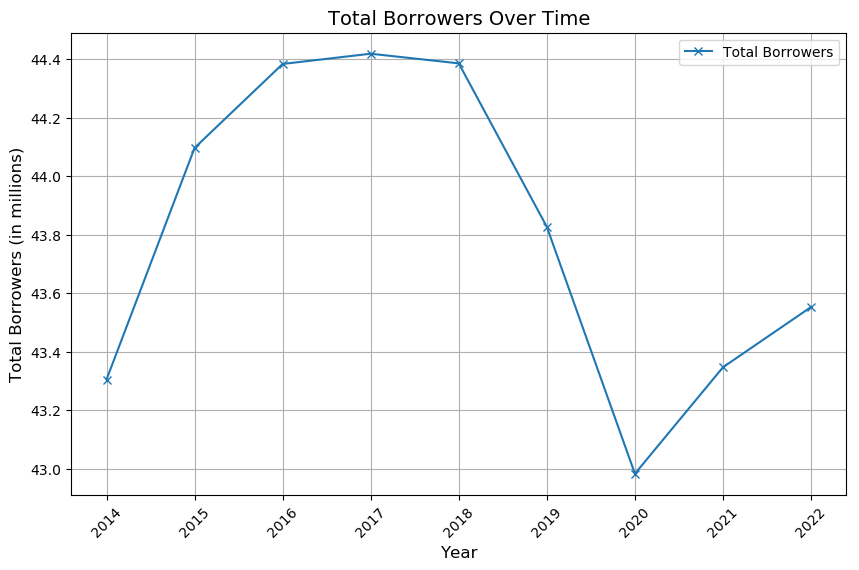

In [109]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(years, totals, marker='x', label='Total Borrowers')
plt.title('Total Borrowers Over Time', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Borrowers (in millions)', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Fit a linear trend line
z = np.polyfit(years, totals, 1)
p = np.poly1d(z)


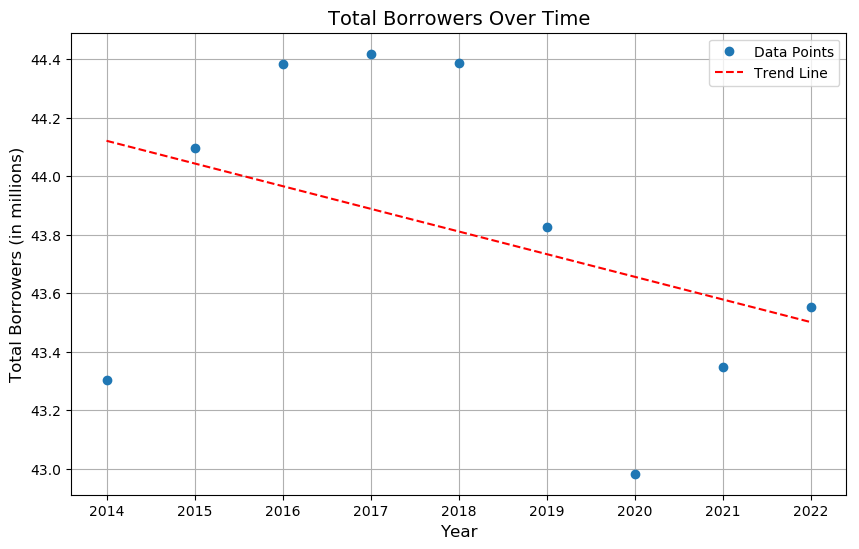

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))


plt.plot(years, totals, "o", label="Data Points")


plt.plot(years, p(years), "r--", label="Trend Line")


plt.title("Total Borrowers Over Time", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Borrowers (in millions)", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


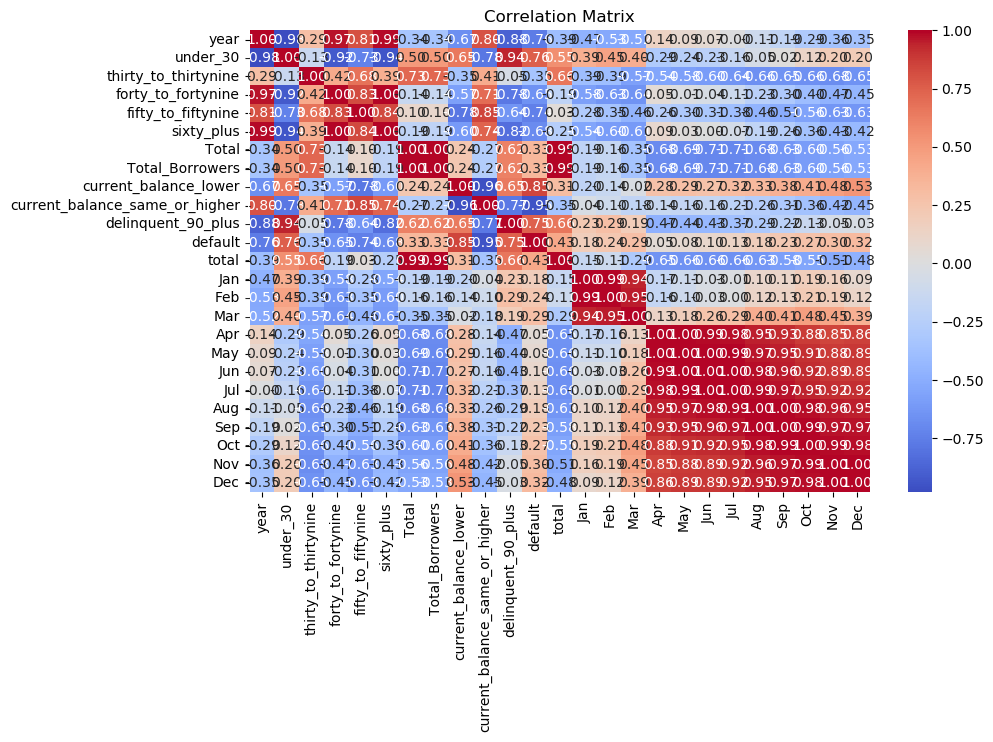

In [113]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.heatmap(time_series_data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [119]:
print("Unique labels in y_train:", set(y_train))
print("Unique labels in y_test:", set(y_test))


Unique labels in y_train: {0, 1, 2, 3, 4, 5, 6}
Unique labels in y_test: {3.004, 4.757}


In [120]:
y_test = [label if label in le.classes_ else "unknown" for label in y_test]


In [ ]:
le = LabelEncoder()
le.fit(list(y_train) + list(y_test))
y_train = le.transform(y_train)
y_test = le.transform(y_test)


In [ ]:
import numpy as np

bins = [0, 1, 2, 3, 4, 5]  
labels = [0, 1, 2, 3, 4]  

y_train = np.digitize(y_train, bins=bins)  
y_test = np.digitize(y_test, bins=bins)  


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test) 


In [125]:
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [126]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (7, 21)
y_train shape: (7,)
X_test shape: (2, 21)
y_test shape: (2,)


In [127]:
import numpy as np
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


In [128]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
print(hasattr(model, 'estimators_'))  # if model works = true


True


In [130]:
y_pred = model.predict(X_test)


Classification Report:
              precision    recall  f1-score   support

           5       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



c:\Users\isfun\.conda\envs\my_new_project_env\lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


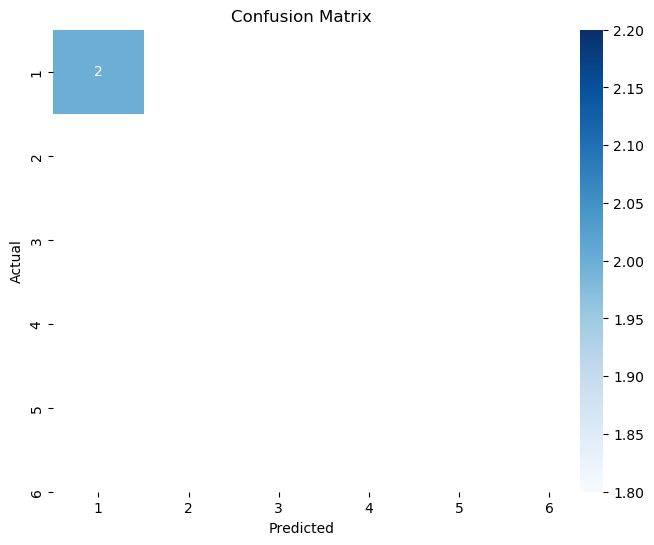

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


print("Classification Report:")
print(classification_report(y_test, y_pred))


cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [155]:
print(time_series_data.columns)



Index(['year', 'under_30', 'thirty_to_thirtynine', 'forty_to_fortynine',
       'fifty_to_fiftynine', 'sixty_plus', 'Total', 'Total_Borrowers',
       'current_balance_lower', 'current_balance_same_or_higher',
       'delinquent_90_plus', 'default', 'total', 'Jan', 'Feb', 'Mar', 'Apr',
       'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
      dtype='object')


In [ ]:

bins = [0, 44, 46, 50] 
labels = ['Low Risk', 'Medium Risk', 'High Risk']

y_categorized = pd.cut(time_series_data['total'], bins=bins, labels=labels)


In [157]:
print(y_categorized.head())
print(y_categorized.value_counts())


0       Low Risk
1    Medium Risk
2    Medium Risk
3    Medium Risk
4    Medium Risk
Name: total, dtype: category
Categories (3, object): ['Low Risk' < 'Medium Risk' < 'High Risk']
total
Low Risk       5
Medium Risk    4
High Risk      0
Name: count, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split

X = time_series_data.drop(columns=['total', 'year']) 
y = y_categorized

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [159]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

    Low Risk       1.00      1.00      1.00         1
 Medium Risk       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



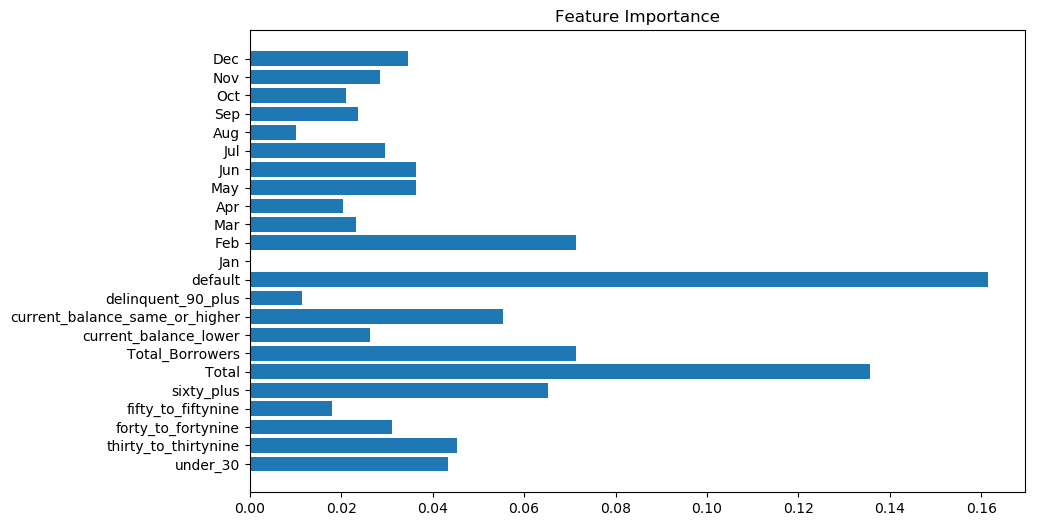

In [160]:
# Feature Importance Plot
import matplotlib.pyplot as plt
feature_importances = model.feature_importances_
features = X_train.columns
plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances)
plt.title('Feature Importance')
plt.show()


In [ ]:
#In Class Example

In [161]:
import pandas as pd

# Simplified dataset
data = pd.DataFrame({
    'Current Balance': [15000, 25000, 20000],
    'Delinquent 90+': [0.02, 0.10, 0.05],
    'Default Rate': [0.01, 0.05, 0.03],
    'Total Borrowers': [44.5, 43.0, 44.0],
    'Risk Level': ['Low Risk', 'High Risk', 'Medium Risk']
})
print(data)


   Current Balance  Delinquent 90+  Default Rate  Total Borrowers   Risk Level
0            15000            0.02          0.01             44.5     Low Risk
1            25000            0.10          0.05             43.0    High Risk
2            20000            0.05          0.03             44.0  Medium Risk


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()
data['Risk Level Encoded'] = le.fit_transform(data['Risk Level'])


X = data[['Current Balance', 'Delinquent 90+', 'Default Rate']]
y = data['Risk Level Encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [169]:
# New loan data
new_loan = pd.DataFrame({
    'Current Balance': [18000],
    'Delinquent 90+': [0.03],
    'Default Rate': [0.02]
})
predicted_risk = model.predict(new_loan)
print("Predicted Risk Level:", le.inverse_transform(predicted_risk))


Predicted Risk Level: ['Medium Risk']


In [ ]:
# run test for the class
current_balance = float(input("Enter Current Balance (e.g., 20000): "))
delinquent_90 = float(input("Enter Delinquent 90+ Rate (e.g., 0.03 for 3%): "))
default_rate = float(input("Enter Default Rate (e.g., 0.02 for 2%): "))


new_loan = pd.DataFrame({
    'Current Balance': [current_balance],
    'Delinquent 90+': [delinquent_90],
    'Default Rate': [default_rate],
})

# Predict risk level
predicted_risk = model.predict(new_loan)
print("Predicted Risk Level:", le.inverse_transform(predicted_risk))


Predicted Risk Level: ['High Risk']
